In [37]:
import sqlite3 as sq
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [101]:
def find_dupes(query, con):
    df = pd.read_sql(query, con).sort_values(by='timestamp').reset_index()
    df_dupes = df[df.duplicated('timestamp', keep=False)]
    return df_dupes, df

In [38]:
con = sq.connect('./CP2.db')

In [79]:
loggers_lu = pd.read_sql("SELECT * FROM loggers_lu", con)
instruments_lu = pd.read_sql("SELECT * FROM instruments_lu", con)

In [136]:
sonic_NF_300cm_1_dupes, sonic_NF_300cm_1 = find_dupes('SELECT * FROM hmp_NF_300cm_1', con)
sonic_NF_300cm_1_dupes

,index,idx,timestamp,ta_avg,rh_avg,ta_min,rh_min,ta_max,rh_max,ta_std,rh_std,ta_spl,rh_spl
4466,14840,0,2019-07-11 10:30:00,23.43385,None,22.70469,15.91942,24.05412,21.72168,0.295588,1.235695,None,16.70203
4467,18107,476,2019-07-11 10:30:00,23.43385,None,22.70469,15.91942,24.05412,21.72168,0.295588,1.235695,None,16.70203


<AxesSubplot:xlabel='timestamp'>

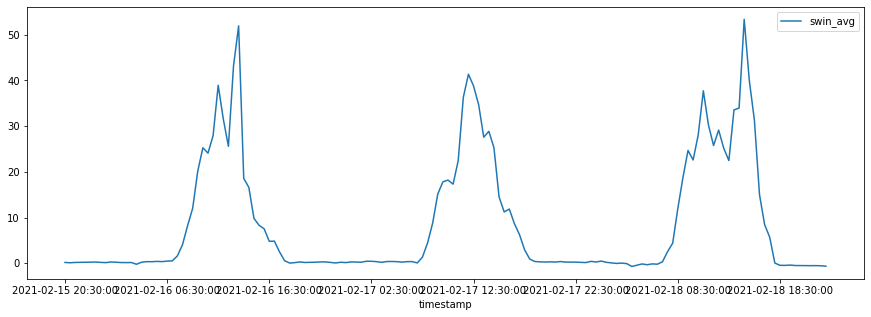

In [135]:
sonic_NF_300cm_1[30700:30850].plot(x='timestamp', y=['swin_avg'], figsize=(15,5))

In [57]:
sonic_NF_1700cm_1['timestamp'] = pd.to_datetime(sonic_NF_1700cm_1['timestamp']).astype('int64')/1e9

In [65]:
sonic_NF_1700cm_1 = sonic_NF_1700cm_1

,index,idx,timestamp,u_avg,v_avg,w_avg,tsonic_avg,diagsonic_avg,u_std,v_std,w_std,tsonic_std,diagsonic_std
0,1354,0,1.556150e+09,0.113551,-0.052567,-0.322462,25.63504,31.38333,0.210471,0.163601,0.49754,0.057675,18.45122
2,1373,19,1.556152e+09,0.108642,-0.061535,-0.312214,25.6431,31.20555,0.20646,0.16268,0.500971,0.061039,18.50697
4,1374,20,1.556154e+09,0.11279,-0.049847,-0.314787,25.6523,31.20555,0.199815,0.151958,0.497876,0.057902,18.51177
6,1375,21,1.556156e+09,0.107124,-0.05601,-0.302588,25.64441,31.20555,0.202563,0.150469,0.493688,0.062733,18.4685
8,1358,4,1.556158e+09,0.145733,-0.052347,-0.305407,25.65246,31.38333,0.194964,0.148291,0.499031,0.057415,18.45122
10,1359,5,1.556159e+09,0.115098,-0.062445,-0.299363,25.65617,31.20555,0.19229,0.175409,0.494291,0.060237,18.50697
12,1360,6,1.556161e+09,0.141492,-0.05211,-0.310038,25.62659,31.20555,0.207102,0.151187,0.499637,0.061427,18.51177
14,1379,25,1.556163e+09,0.13403,-0.07559,-0.321594,25.59232,31.20555,0.206894,0.145416,0.493172,0.062466,18.4685
16,1362,8,1.556165e+09,0.099567,-0.058822,-0.308062,25.56278,31.38333,0.213418,0.163353,0.487664,0.062572,18.45122
18,1381,27,1.556167e+09,0.126997,-0.04941,-0.303803,25.53116,31.20555,0.209533,0.155332,0.489029,0.059832,18.50697


In [55]:
1599906600.000000000

-34822800000000000

<AxesSubplot:>

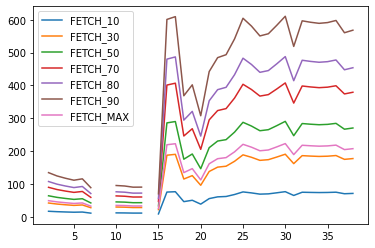

In [69]:
flux[['FETCH_10',
 'FETCH_30',
 'FETCH_50',
 'FETCH_70',
 'FETCH_80',
 'FETCH_90',
 'FETCH_MAX']].plot()

In [70]:
raw_bio = pd.read_csv("biomet.csv", skiprows=[1])

In [71]:
raw_bio.columns

Index(['TIMESTAMP_1', 'WD_1_1_1', 'Pa_1_1_1', 'Ta_1_1_1', 'Tbc_1_1_1',
       'RH_1_1_1', 'Tc_1_1_1', 'SWin_1_1_1', 'SWout_1_1_1', 'LWin_1_1_1',
       'LWout_1_1_1', 'Rn_1_1_1', 'PPFD_1_1_1', 'Rg_1_1_1'],
      dtype='object')

<AxesSubplot:>

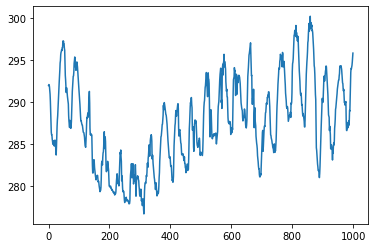

In [73]:
raw_bio['Ta_1_1_1'].plot()